In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')

In [2]:
df.head()

df.isnull().sum()
# i need to drop some colums here...

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
df.drop(['age'],axis=1,inplace=True)
df.drop(['sex'],axis=1,inplace=True)
df.drop(['trestbps'],axis=1,inplace=True)
df.drop(['fbs'],axis=1,inplace=True)
df.drop(['restecg'],axis=1,inplace=True)
df.drop(['exang'],axis=1,inplace=True)

In [4]:
# most corrilated values or label
df.head()

,cp,chol,thalach,oldpeak,slope,ca,thal,target
0,3,233,150,2.3,0,0,1,1
1,2,250,187,3.5,0,0,2,1
2,1,204,172,1.4,2,0,2,1
3,1,236,178,0.8,2,0,2,1
4,0,354,163,0.6,2,0,2,1


In [5]:
import seaborn as sns

sns.pairplot(df,hue='target')

/Users/Basha/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Basha/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


In [6]:
y = df['target']
x = df.drop(['target'],axis=1)

In [7]:
# related to webapp code ......

from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)



In [8]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)


/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8524590163934426

In [17]:
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
  
# Creating the hyperparameter grid 
c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 
  
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 6) 
  
logreg_cv.fit(x_train,y_train)

/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refi

In [18]:
pred = logreg_cv.predict(x)



In [22]:
logreg_cv.score(x_test,y_test)

0.8524590163934426

In [12]:
pred = lr.predict(x)


In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y,pred)
cm

array([[107,  31],
       [ 19, 146]])

In [14]:
from sklearn.metrics import classification_report
cr = classification_report(y,pred)

In [15]:
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       138
           1       0.82      0.88      0.85       165

    accuracy                           0.83       303
   macro avg       0.84      0.83      0.83       303
weighted avg       0.84      0.83      0.83       303



In [16]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7704918032786885

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model = model.fit(x,y)


/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
pred = model.predict(x)
pred.mean()

0.6006600660066007

In [30]:
model.score(x,y)

0.8382838283828383

In [12]:
# sunpport vector michine 
from sklearn.svm import SVC
svc = SVC(kernel = 'linear')
svc.fit(x,y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
pred = svc.predict(x)
pred.mean()

0.6039603960396039

In [14]:
svc.score(x,y)

0.8481848184818482

In [15]:
# RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x,y)


/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
rfc.score(x,y)

1.0

In [16]:
pred = rfc.predict(x)
pred.mean()

0.5445544554455446

In [17]:
#DT
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt = dt.fit(x,y)

In [18]:
dt.score(x,y)

1.0

In [19]:
pred = dt.predict(x)
pred.mean()

0.5445544554455446

In [20]:
from sklearn.tree import plot_tree
cls = plot_tree(dt)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x, y)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [22]:
knn.score(x,y)

0.7491749174917491

In [ ]:
# finding the best k- value with help of error rate and accuraacy rate by ploting it...



In [16]:
# step: 2 if i do this way how score will get let's see......
from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()
process_columns = ['chol','cp','thalach','thal','oldpeak','slope']
df[process_columns] = StandardScaler.fit_transform(df[process_columns])

In [17]:
df.head()


,cp,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,1.973123,-0.256334,0.015443,0,1.087338,-2.274579,0,-2.148873,1
1,1.002577,0.072199,1.633471,0,2.122573,-2.274579,0,-0.512922,1
2,0.032031,-0.816773,0.977514,0,0.310912,0.976352,0,-0.512922,1
3,0.032031,-0.198357,1.239897,0,-0.206705,0.976352,0,-0.512922,1
4,-0.938515,2.082050,0.583939,1,-0.379244,0.976352,0,-0.512922,1


In [18]:
y = df['target']
x = df.drop(['target'],axis=1)

In [19]:
# Choosing the k-value
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)




accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,df['target'],cv=10)
    accuracy_rate.append(score.mean())

In [20]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df,df['target'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

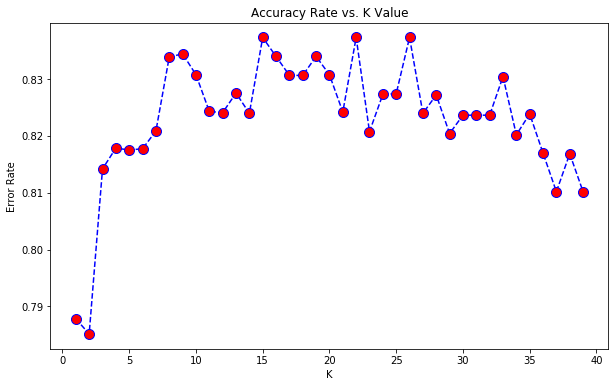

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

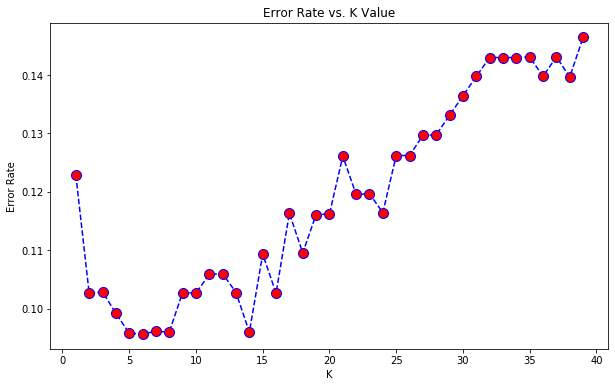

In [58]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                     weights='uniform')

In [72]:
knn.score(x,y)

0.8448844884488449